<img src="https://avatars.githubusercontent.com/u/74911464?s=200&v=4"
     alt="OpenEO Platform logo"
     style="float: left; margin-right: 10px;" />
# OpenEO Platform - User Story 1

### Access of pre-computed data for Sentinel 2 over a large area.

In [7]:
from openeoPlatform import *

## Step 1 -  Access of pre-computed data over a large area

In [8]:
center = [47.29, 10.75]
zoom = 7

eoMap = openeoMap(center,zoom)
addS2Tiles(eoMap)
eoMap.map

Map(center=[47.29, 10.75], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

## openEO graph creation and processing for S2

1. Open the connection with VITO back-end.

In [9]:
connection = openeo.connect("https://openeo-dev.vito.be").authenticate_basic('guest','guest123')

2. Define range of interest in time from Sentinel-2, Sentinel-1 and Landsat.

In [10]:
collection      = 'SENTINEL2_L2A_SENTINELHUB'
spatial_extent  = {'west':eoMap.bbox[0],'east':eoMap.bbox[2],'south':eoMap.bbox[1],'north':eoMap.bbox[3],'crs':'EPSG:4326'}
temporal_extent = ["2019-09-18", "2019-09-20"]
bands           = ["B04"]

s2_l2a = connection.load_collection(collection,spatial_extent=spatial_extent,bands=bands,temporal_extent=temporal_extent)

3. Save operation as final step to the pipeline.

In [11]:
s2_l2a_geotiff = s2_l2a.save_result(format="GTIFF")

4. Visualize the openEO process graph.

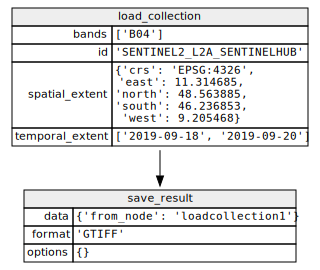

In [12]:
s2_l2a_geotiff.to_graphviz()

6. Create a new batch job on the back-end and ask to process it.

In [10]:
job = connection.create_job(s2_l2a_geotiff.graph)
if job.job_id:
    print(job.job_id)
    job.start_job()
    job.describe_job()
else:
    print("Job ID is None")

586ff1fd-1dd0-4c0f-94b1-4e99183266de


We can get a description of the job and check its status.

In [13]:
my_job = connection.job("586ff1fd-1dd0-4c0f-94b1-4e99183266de")
my_job.describe_job()

{'cpu_time_human_readable': '52040 cpu-seconds',
 'cpu_time_seconds': 52040,
 'created': '2021-02-23T17:26:38Z',
 'duration_human_readable': '0:40:34',
 'duration_seconds': 2434,
 'id': '586ff1fd-1dd0-4c0f-94b1-4e99183266de',
 'memory_time_human_readable': '116656705 MB-seconds',
 'memory_time_megabyte_seconds': 116656705,
 'process': {'process_graph': {'loadcollection1': {'arguments': {'bands': ['B04'],
     'id': 'SENTINEL2_L2A_SENTINELHUB',
     'spatial_extent': {'crs': 'EPSG:4326',
      'east': 11.476995,
      'north': 48.53928,
      'south': 46.173111,
      'west': 9.225255},
     'temporal_extent': ['2019-09-18', '2019-09-20']},
    'process_id': 'load_collection'},
   'saveresult1': {'arguments': {'data': {'from_node': 'loadcollection1'},
     'format': 'GTIFF',
     'options': {}},
    'process_id': 'save_result',
    'result': True}}},
 'status': 'finished',
 'updated': '2021-02-23T17:27:10Z'}

7. Once the job status is 'finished', we can download the result and visualize it.

In [15]:
my_job.download_result()

PosixPath('/home/mclaus@eurac.edu/OpenEO_platform/out')

In [16]:
xr.open_rasterio('out.tif')

<xarray.DataArray (band: 1, y: 26591, x: 16546)>
[439974686 values with dtype=uint16]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 5.379e+06 5.379e+06 5.379e+06 ... 5.113e+06 5.113e+06
  * x        (x) float64 5.174e+05 5.174e+05 5.174e+05 ... 6.828e+05 6.828e+05
Attributes:
    transform:      (10.0, 0.0, 517380.0, 0.0, -10.0, 5379210.0)
    crs:            +init=epsg:32632
    res:            (10.0, 10.0)
    is_tiled:       1
    nodatavals:     (0.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

In [14]:
addLayer(eoMap,'out.tif','B04',clip=[0,1500])
eoMap.map

Map(bottom=11655.0, center=[47.52461999690651, 10.513933362267885], controls=(ZoomControl(options=['position',…

## openEO graph creation and processing for S1

In [15]:
collection      = 'TERRASCOPE_S1_GAMMA0_V1'
spatial_extent  = {'west':eoMap.bbox[0],'east':eoMap.bbox[2],'south':eoMap.bbox[1],'north':eoMap.bbox[3],'crs':'EPSG:4326'}
temporal_extent = ["2019-09-18", "2019-09-20"]
bands           = ["VV","VH"]

s1 = connection.load_collection(collection,spatial_extent=spatial_extent,bands=bands,temporal_extent=temporal_extent)

3. Save operation as final step to the pipeline.

In [16]:
s1_geotiff = s1.save_result(format="GTIFF")

4. Visualize the openEO process graph.

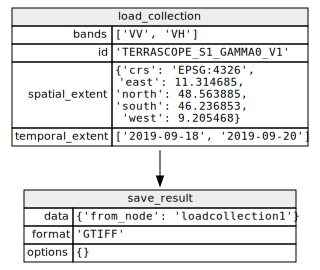

In [17]:
s1_geotiff.to_graphviz()

6. Create a new batch job on the back-end and ask to process it.

In [18]:
job = connection.create_job(s2_l2a_geotiff.graph)
if job.job_id:
    print(job.job_id)
    job.start_job()
    job.describe_job()
else:
    print("Job ID is None")

e868f514-eac1-4401-8357-84a831e253a8


We can get a description of the job and check its status.

In [19]:
my_job = connection.job("586ff1fd-1dd0-4c0f-94b1-4e99183266de")
my_job.describe_job()

{'cpu_time_human_readable': '52040 cpu-seconds',
 'cpu_time_seconds': 52040,
 'created': '2021-02-23T17:26:38Z',
 'duration_human_readable': '0:40:34',
 'duration_seconds': 2434,
 'id': '586ff1fd-1dd0-4c0f-94b1-4e99183266de',
 'memory_time_human_readable': '116656705 MB-seconds',
 'memory_time_megabyte_seconds': 116656705,
 'process': {'process_graph': {'loadcollection1': {'arguments': {'bands': ['B04'],
     'id': 'SENTINEL2_L2A_SENTINELHUB',
     'spatial_extent': {'crs': 'EPSG:4326',
      'east': 11.476995,
      'north': 48.53928,
      'south': 46.173111,
      'west': 9.225255},
     'temporal_extent': ['2019-09-18', '2019-09-20']},
    'process_id': 'load_collection'},
   'saveresult1': {'arguments': {'data': {'from_node': 'loadcollection1'},
     'format': 'GTIFF',
     'options': {}},
    'process_id': 'save_result',
    'result': True}}},
 'status': 'finished',
 'updated': '2021-02-23T17:27:10Z'}

# Step 2 - Visualize the metadata of the input collection
## Data is CARD4L compliant.